https://www.kaggle.com/code/youssifhassan/telco-customer-churn2
    
this site make model and prediction also some feature selection based of mean, difference, risk and find global mean, with train,test and validation data set.

* feature vs churn graph

https://www.kaggle.com/code/ashirzaki/customer-churn-prediction-model
    
this website contain proper customer churn preprocessing steps like relation between features and churning, with description

use oversampling technique because the data set is imbalance so make sample as need for churn = yes and no., feature importance graph.

* graph of feature importance
* monthy charges churn graph
* feature by category graph

https://www.kaggle.com/code/redpen12/12-classification-models-detailed-explanations
    
all concepts of preprocessing steps, imbalance data set, methods all

MLP multilayer perceptron feed forward artificial neural network

total 21 features including target

approach to fill column

outliers analysis

dealing with outliers

encoding 

feature imporance graph

confusion matrix

* graph of churn by category 

https://www.kaggle.com/code/sadiakhatun/telco-customer-churn-prediction-with-ann

label encoding

dummy data create

confusion matrix

imbalance data set handling

ANN

* customer churn vs tenure
* customer vs montly charges


https://www.kaggle.com/code/pragya2611/telecom-churn-prediction

* churn vs other variable graph
* separate graph for different feature


https://www.kaggle.com/code/imethgunawardena/outlier-the-silent-killer
    
outliers type

* not relevent model and datasets`

https://www.kaggle.com/code/mrisdal/starter-telco-customer-churn-bd964f82-8
    
EDA of dataset 

all graph which relevent from class

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from tqdm import tqdm
import seaborn as sns
from pandas import DataFrame
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from tensorflow import keras



---


**This dataset consists of 7043 examples and 21 features**




---
**About Data**

* **customerID**: Customer ID
* **gender**: Whether the customer is a male or a female
* **Senior Citizen**: Whether the customer is a senior citizen or not (1, 0)
* **Partner**: Whether the customer has a partner or not (Yes, No)
* **Dependents**: Whether the customer has dependents or not (Yes, No)
* **tenure**: Number of months the customer has stayed with the company
* **Phone Service**: Whether the customer has a phone service or not (Yes, No)
* **Multiple Lines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
* **Internet Service**: Customer’s internet service provider (DSL, Fiber optic, No)
* **Online Security**: Whether the customer has online security or not (Yes, No, No internet service)
* **Online Backup**: Whether the customer has online backup or not (Yes, No, No internet service)
* **Device Protection**: Whether the customer has device protection or not (Yes, No, No internet service)
* **Tech Support**: Whether the customer has tech support or not (Yes, No, No internet service)
* **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
* **Streaming**: Whether the customer has streaming movies or not (Yes, No, No internet service)
* **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
* **Paperless Billing**: Whether the customer has paperless billing or not (Yes, No)
* **Payment Method**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **Monthly Charges**: The amount charged to the customer monthly
* **Total Charges**: The total amount charged to the customer
* **Churn Label**: Whether the customer churned or not (Yes or No)


---



---



In [3]:
# Load data
df = pd.read_csv('Dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
n_rows, n_columns = df.shape
print(f"Number of columns: {n_columns} columns\nNumber of rws: {n_rows} rows")

Number of columns: 21 columns
Number of rws: 7043 rows


In [6]:
# Here the CustomerID is unique and it's not relevent model so we are going to drop this column
df.drop('customerID',axis='columns',inplace=True)

In [7]:
# Converting Total Charges to a numerical data type
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# Imbalance Dataset
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

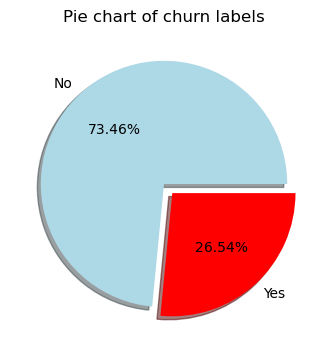

In [9]:
churn_label_count = df["Churn"].value_counts()
fig = plt.figure(figsize=(7, 4), dpi=100)
plt.pie(
    churn_label_count,
    autopct="%.2f%%",
    labels=churn_label_count.index,
    colors=["lightblue", "red"],
    explode=[0, 0.1],
    shadow=True,
)
plt.title("Pie chart of churn labels")
plt.show()

In [10]:
df.TotalCharges.isnull().sum()

11

In [11]:
# df.iloc[488]

---

There are three methods we can approach to handle Null values:

1)Removing
2)Imputing - iterative, mean, max, median, KNN, constant value impute, mode(frequent), zero
3)Masking

We are going with impute method and impute with Mean Method.

---

In [12]:
# Convert 'TotalCharges' column to float, and replace empty strings with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Print index of rows with missing data in the 'TotalCharges' column
rows_with_missing_data = df[df['TotalCharges'].isnull()]
print(rows_with_missing_data.index)

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


In [13]:
# Fill that 11 rows with mean
mean_total_charges = df['TotalCharges'].mean()
df['TotalCharges'].fillna(mean_total_charges, inplace=True)

In [14]:
df.TotalCharges.isnull().sum()

0

In [15]:
df.TotalCharges[488]

2283.3004408418656

In [16]:
n_rows, n_columns = df.shape
print(f"Number of columns: {n_columns} columns\nNumber of rws: {n_rows} rows")

Number of columns: 20 columns
Number of rws: 7043 rows


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


100%|██████████| 4/4 [00:00<00:00, 15.99it/s]


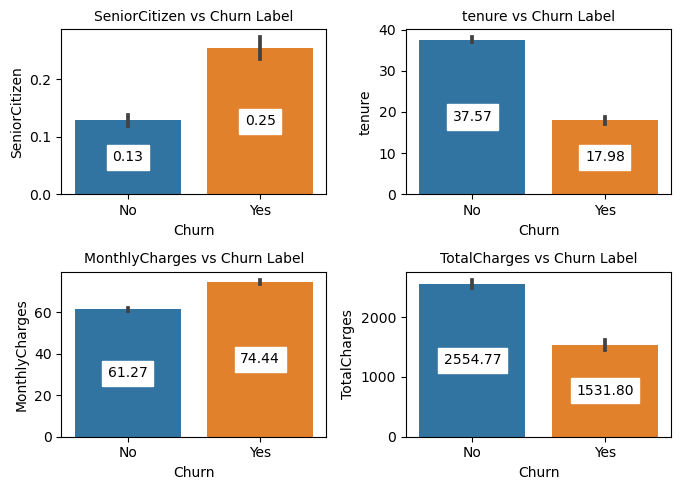

In [18]:
# Analysis of numeric columns with barchart

numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

fig, axes = plt.subplots(2, 2, figsize=(7, 5))
axes = axes.flatten()
for i, column in enumerate(tqdm(numeric_columns)):
    ax = axes[i]
    sns.barplot(data=df, x="Churn", y=column, ax=ax, estimator=np.mean)
    ax.set_title(f"{column} vs Churn Label", fontsize=10)

    for k in ax.containers:
        ax.bar_label(
            k, fontsize=10, label_type="center", backgroundcolor="w", fmt="%.2f"
        )
plt.tight_layout()
plt.show()

A customer not churn who has 37.57 month tenure
a customer churn who has 17.98 month tenure

it means customer belive in short term planning.

A customer has average lower charges (61.27), not churn
A customer has average higher charges (74.44) churn

A customer has average Total chaarges 3554.77, not churned
A customer has average Total charges 1531.80, churned

In [19]:
# Categorical Analysis

def get_unique(dataframe: DataFrame):
    cat_cols = dataframe.select_dtypes(exclude="number")
    uni_values = []
    counts = []
    pct = []

    for col in cat_cols.columns:
        uni_value, count = np.unique(
            np.array(cat_cols[col], dtype=str), return_counts=True
        )
        uni_values.append(uni_value)
        counts.append(count)
        pct.append(np.round(count / count.sum() * 100, 2))

    return pd.DataFrame(
        {
            "dtype": cat_cols.dtypes,
            "unique_values": uni_values,
            "counts": [len(val) for val in uni_values],
            "values_count": counts,
            "pct": pct,
        }
    )

In [20]:
get_unique(df)

,dtype,unique_values,counts,values_count,pct
gender,object,"[Female, Male]",2,"[3488, 3555]","[49.52, 50.48]"
Partner,object,"[No, Yes]",2,"[3641, 3402]","[51.7, 48.3]"
Dependents,object,"[No, Yes]",2,"[4933, 2110]","[70.04, 29.96]"
PhoneService,object,"[No, Yes]",2,"[682, 6361]","[9.68, 90.32]"
MultipleLines,object,"[No, No phone service, Yes]",3,"[3390, 682, 2971]","[48.13, 9.68, 42.18]"
InternetService,object,"[DSL, Fiber optic, No]",3,"[2421, 3096, 1526]","[34.37, 43.96, 21.67]"
OnlineSecurity,object,"[No, No internet service, Yes]",3,"[3498, 1526, 2019]","[49.67, 21.67, 28.67]"
OnlineBackup,object,"[No, No internet service, Yes]",3,"[3088, 1526, 2429]","[43.84, 21.67, 34.49]"
DeviceProtection,object,"[No, No internet service, Yes]",3,"[3095, 1526, 2422]","[43.94, 21.67, 34.39]"
TechSupport,object,"[No, No internet service, Yes]",3,"[3473, 1526, 2044]","[49.31, 21.67, 29.02]"


In [21]:
cat_cols = df.dtypes[df.dtypes == "O"].index
cat_cols = cat_cols.drop(["customerID", "Churn"], errors="ignore")

fig, axes = plt.subplots(4, 4, figsize=(20, 18), dpi=500)
axes = axes.flatten()
fig.suptitle("Churn by Category", fontsize=25, fontweight="bold", y=1)

for i, col in enumerate(cat_cols):
    ax = axes[i]
    sns.countplot(data=df, x=col, hue="Churn", ax=ax, palette="Set2")
    ax.legend(frameon=True, facecolor="inherit", shadow=True)
    ax.set_title(f"Churn by {col}", fontsize=13)
    plt.tight_layout(pad=0.6)

    for i in ax.containers:
        ax.bar_label(i, fontsize=13)
plt.delaxes(ax=axes[-1])
plt.tight_layout()

C:\Users\mridu1\AppData\Local\Temp\ipykernel_28860\3702348669.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.6)
C:\Users\mridu1\AppData\Local\Temp\ipykernel_28860\3702348669.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.6)
C:\Users\mridu1\AppData\Local\Temp\ipykernel_28860\3702348669.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.6)
C:\Users\mridu1\AppData\Local\Temp\ipykernel_28860\3702348669.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.6)
C:\Users\mridu1\AppData\Local\Temp\ipykernel_28860\3702348669.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.6)
C:\Users\mridu1\AppData\Local\Temp\ipykernel_28860\3702348669.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=0.6)
C:\Users\mridu1\AppData\Local\Temp\ipykernel_28860\3702348669.py:13: UserWarning: The figure layout has ch

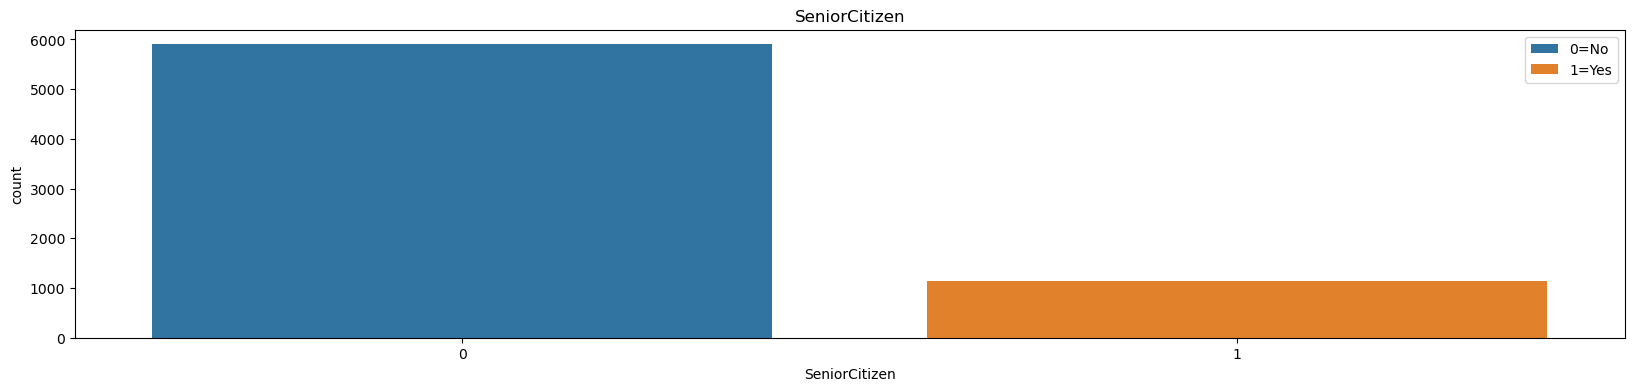

In [22]:
## Use for Counting remaining Features

cols = ['SeniorCitizen']
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=df,label=['0=No','1=Yes'])
    ax.set_title(f"{col}")
plt.legend()

In [23]:
# tenure_churn_no=df[df.Churn=='No'].SeniorCitizen
# tenure_churn_yes=df[df.Churn=='Yes'].SeniorCitizen


# plt.xlabel('Tenure')
# plt.ylabel('Number of Customer')
# plt.title('Customer Churn Prediction visualization')
# plt.hist([tenure_churn_yes,tenure_churn_no],color=['C4','C6'],
#          label=['Churn=Yes','churn=No'])
 
# plt.legend()

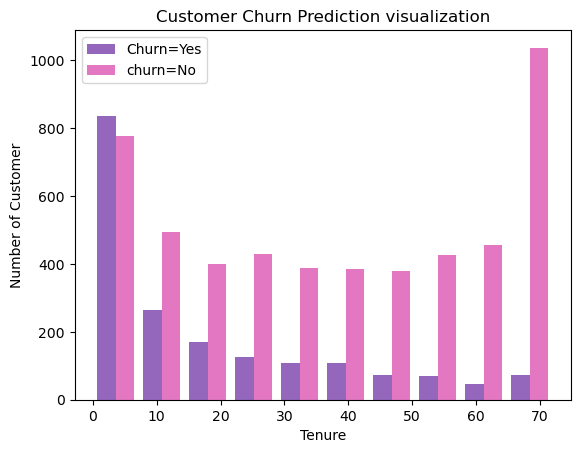

In [24]:
tenure_churn_no=df[df.Churn=='No'].tenure
tenure_churn_yes=df[df.Churn=='Yes'].tenure


plt.xlabel('Tenure')
plt.ylabel('Number of Customer')
plt.title('Customer Churn Prediction visualization')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['C4','C6'],
         label=['Churn=Yes','churn=No'])
 
plt.legend()

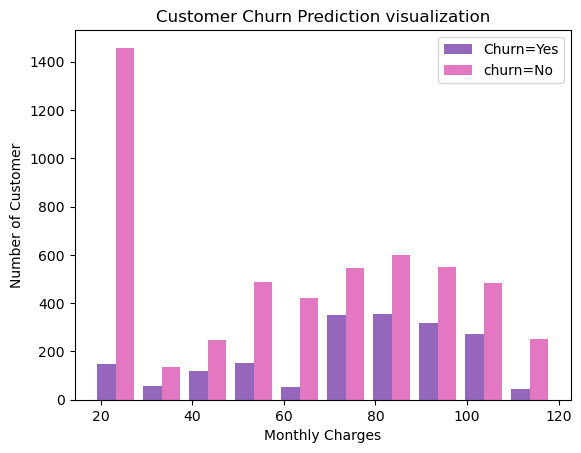

In [25]:
tenure_churn_no=df[df.Churn=='No'].MonthlyCharges
tenure_churn_yes=df[df.Churn=='Yes'].MonthlyCharges


plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customer')
plt.title('Customer Churn Prediction visualization')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['C4','C6'],
         label=['Churn=Yes','churn=No'])
 
plt.legend()

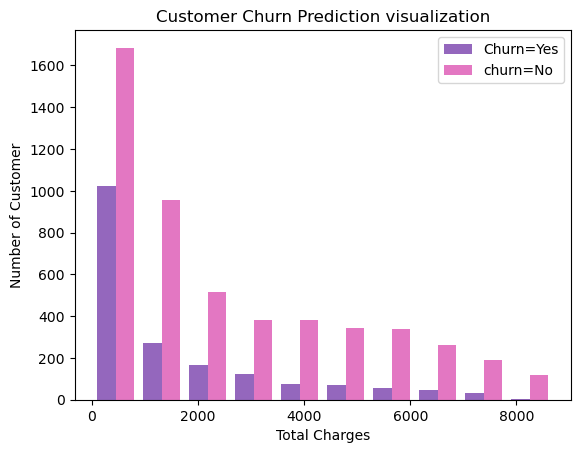

In [26]:
tenure_churn_no=df[df.Churn=='No'].TotalCharges
tenure_churn_yes=df[df.Churn=='Yes'].TotalCharges


plt.xlabel('Total Charges')
plt.ylabel('Number of Customer')
plt.title('Customer Churn Prediction visualization')
plt.hist([tenure_churn_yes,tenure_churn_no],color=['C4','C6'],
         label=['Churn=Yes','churn=No'])
 
plt.legend()

<Axes: xlabel='Churn', ylabel='tenure'>

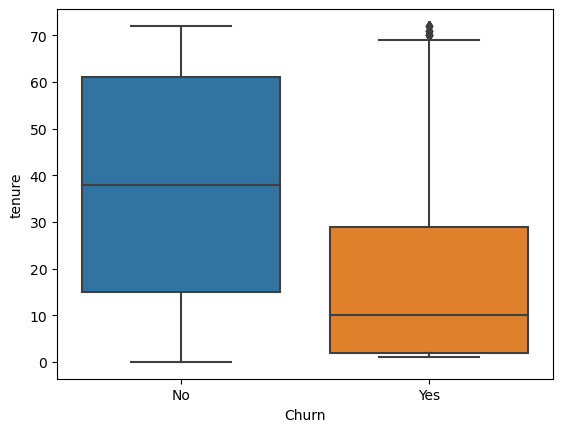

In [27]:
sns.boxplot(x='Churn', y='tenure', data=df)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

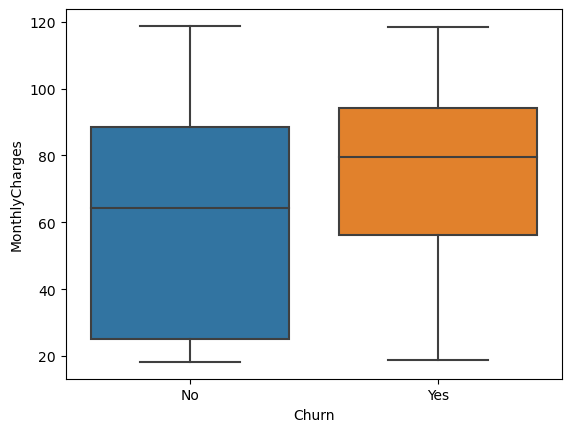

In [28]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

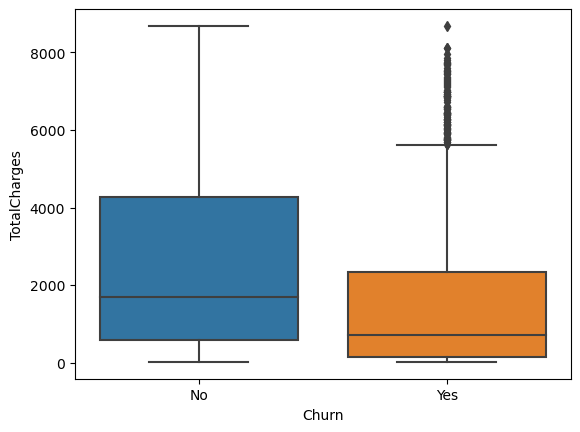

In [29]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)

### Encoding techniques

### we have to Encoding because we have lots of data in the form of category

1. label Encoding
2. Integer Encoding
3. Frequency Encoding
4. Target Encoding(mean Encoding)
5. Binary Encoding
6. Onehot Encoding



In [30]:
#let's covert each yes and no with one and zero
yes_no_columns =['Partner','Dependents','PhoneService','PaperlessBilling',
                 'Churn']

for col in yes_no_columns:
    df[col].replace({'Yes':1,'No':0},inplace=True)

# Since we only have male and female in gender lets
# Convert col gender to Male and if value true then
# gender male else female.
df = df.rename(columns={'gender': 'Gender_male'})
df['Gender_male'].replace({'Male':1,'Female':0},inplace=True)

In [31]:
#create dummy columns after oneHotencodein

df=pd.get_dummies(data=df,columns=['OnlineSecurity', 'OnlineBackup', 'InternetService','Contract','PaymentMethod','MultipleLines','DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies'],dtype=float)

df.columns

Index(['Gender_male', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_

In [32]:
df

,Gender_male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
7039,0,0,1,1,72,1,1,103.20,7362.90,0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7041,1,1,1,0,4,1,1,74.40,306.60,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Scaling Data

1. Mix Max Scaling
2. Standard Scaling ---
3. Log Transformation
4. Max ABsolute Scaling (-1 to 1)


In [33]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [34]:
df.head()

,Gender_male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,-1.277445,0,1,-1.160323,-0.994971,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,0,0,0,0.066327,1,0,-0.259629,-0.173876,0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0,0,-1.236724,1,1,-0.362660,-0.960399,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,0,0,0,0.514251,0,0,-0.746535,-0.195400,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,0,0,0,-1.236724,1,1,0.197365,-0.941193,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [35]:
for column in df:
    print(f'{column}:{df[column].unique()}')

Gender_male:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[-1.27744458  0.06632742 -1.23672422  0.51425142 -0.99240204 -0.42231695
 -0.91096131 -0.17799476  1.2064976  -0.78880022 -0.66663913  1.04361615
  0.67713287 -0.30015585  1.49154015  0.79929397  1.57298088 -0.46303731
 -0.82952058 -0.09655404  0.59569215  1.61370124 -0.62591876 -0.21871513
 -1.11456313  0.55497178 -0.87024095  1.53226051  1.24721797  0.43281069
 -0.70735949  1.12505688 -0.5851984   1.36937906 -0.95168167 -1.19600386
 -0.05583367  0.71785324  1.28793833  0.96217542 -1.0331224   0.39209033
  0.10704778  0.63641251 -0.1372744   1.32865869  0.22920887  1.45081979
 -0.01511331  0.92145506  0.18848851  0.14776815  0.35136997 -1.07384277
 -1.15528349  0.02560706  1.41009942 -0.38159658  1.00289578  1.16577724
 -0.74807986 -0.50375767  0.84001433  0.3106496   1.08433651 -0.34087622
  0.47353106 -0.54447804  0.88073469  0.7585736  -0.25943549 -1.31816495
  0.26992924]
PhoneService:[0 1]
PaperlessBillin

### Dataset done -----------------------------------------------------------------------------------------------------------------------------------

### Train-test split -----------------------------------------------------------------------------------------------------------------------------------

In [36]:
xin = df.drop('Churn', axis='columns')
yout = df['Churn']

# 70-30 split since our data set is nearly 7000 samples
# 30% test train will be nearly 2000 samples
from sklearn.model_selection import train_test_split
xin_train, xin_test, yout_train, yout_test = train_test_split(xin, yout, test_size=0.3, random_state=12)

### SMOTE over sampling

In [37]:
### Apply SMOTE only over the training set to ensure synthetic samples are generated based solely on the information within the training data. 
### SMOTE Before Splitting: Can lead to overfitting and optimistic performance estimates as the synthetic samples may contain information from the test set, resulting in artificially inflated evaluation metrics.
### SMOTE After Splitting (On Training Set): Ensures that the model is trained on a balanced dataset without contaminating the test set, leading to a more accurate assessment of the model's generalization capabilities on unseen data.

print(yout_train.value_counts())
print(yout_test.value_counts())

from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='minority')
xin_train, yout_train = oversample.fit_resample(xin_train, yout_train)

print("\n*************************Balanced Train Dataset after oversampling*************************\n")
print(yout_train.value_counts())
print(yout_test.value_counts())

print("\n*************************Shape of Train Dataset after oversampling*************************\n")
print(xin_train.shape)

Churn
0    3599
1    1331
Name: count, dtype: int64
Churn
0    1575
1     538
Name: count, dtype: int64

*************************Balanced Train Dataset after oversampling*************************

Churn
0    3599
1    3599
Name: count, dtype: int64
Churn
0    1575
1     538
Name: count, dtype: int64

*************************Shape of Train Dataset after oversampling*************************

(7198, 40)


### Train Data is balanced -------------------------------------------------------

### Model Architecture ----------------------------------------------------------

In [61]:
# One input layer, one hidden layer, one output layer

# EXP_COMMENT: experiment with hidden layer, num of units in each layer, 
# optimizer and epochs
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization

learning_rate = 0.01

optimizer = SGD(learning_rate=learning_rate) # SGD, RMSprop, AdaDelta*



model = keras.Sequential([
    keras.layers.Dense(40, input_shape=(40,), activation='relu'),
    BatchNormalization(),
    keras.layers.Dense(20, activation='relu'),
    BatchNormalization(),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer=optimizer,
              loss='binary_crossentropy', # Categorical Cross-Entropy
              metrics=['accuracy'])

model.fit(xin_train,yout_train,epochs=100, batch_size=32)
print(model.summary())

test_loss, test_accuracy = model.evaluate(xin_test, yout_test)
print(f'Test Accuracy: {test_accuracy}')

Epoch 1/100
225/225 [==============================] - 1s 1ms/step - loss: 0.5558 - accuracy: 0.7255
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4863 - accuracy: 0.7635
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.7688
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4677 - accuracy: 0.7794
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.7790
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4605 - accuracy: 0.7837
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4515 - accuracy: 0.7899
Epoch 8/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.7862
Epoch 9/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.7927
Epoch 10/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4482 - accura

225/225 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8263
Epoch 82/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3698 - accuracy: 0.8361
Epoch 83/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3661 - accuracy: 0.8351
Epoch 84/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3791 - accuracy: 0.8315
Epoch 85/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3734 - accuracy: 0.8329
Epoch 86/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3687 - accuracy: 0.8341
Epoch 87/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8409
Epoch 88/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.8298
Epoch 89/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3617 - accuracy: 0.8386
Epoch 90/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3662 - accuracy: 

### K cross Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

num_splits = 5
kfold = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=12)

# Lists to store cross-validation results
cv_accuracy = []
cv_loss = []
train_accuracy = []
test_accuracy = []

# Iterate over the folds
for train_index, val_index in kfold.split(xin_train, yout_train):
    xin_train_fold, xin_val_fold = xin_train.iloc[train_index], xin_train.iloc[val_index]
    yout_train_fold, yout_val_fold = yout_train.iloc[train_index], yout_train.iloc[val_index]

    # Train the model on the resampled training data
    history = model.fit(xin_train_fold, yout_train_fold, epochs=100, verbose=0)

    # Evaluate the model on the validation fold
    val_loss, val_accuracy = model.evaluate(xin_val_fold, yout_val_fold, verbose=0)

    
    # Evaluate the model on the training set
    train_loss, train_acc = model.evaluate(xin_train_fold, yout_train_fold, verbose=0)
    train_accuracy.append(train_acc)

    # Evaluate the model on the testing set
    test_loss, test_acc = model.evaluate(xin_val_fold, yout_val_fold, verbose=0)
    test_accuracy.append(test_acc)
    
    cv_loss.append(test_loss)
    cv_accuracy.append(test_acc)

In [ ]:
# Print cross-validation results

print("\n************************* Cross-Validation Results *************************\n")
print(f"Accuracy : {cv_accuracy} \nLoss : {cv_loss}")
print(f"Average Accuracy: {np.mean(cv_accuracy):.4f}")
print(f"Average Loss: {np.mean(cv_loss):.4f}")

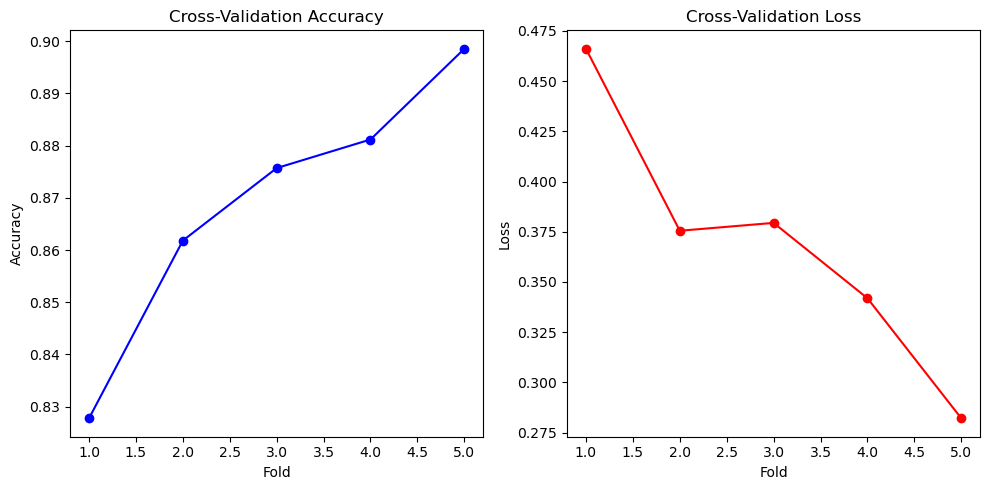

In [41]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, num_splits + 1), cv_accuracy, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')

# Plot cross-validation loss
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, num_splits + 1), cv_loss, marker='o', linestyle='-', color='r')
plt.title('Cross-Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()